Fake News Identifier

Created by: Daniel Starer

Created: 9/17/2025

Updated:

This project uses the Fake News dataset from Kagle compiled by Aleksei Golovin.  This aim of this project is to use Python and Natural Language Processing (NLP) to identify if an article is fake news or real news.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will initialize the dataset as News_Sources.

In [7]:
News_Sources = pd.read_csv('FakeNewsNet.csv')

In [8]:
News_Sources.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


Since the data already has a real/fake column, we won't need to create one ourselves.  We can just move on to visualization of articles flagged as real(1) and fake(0).

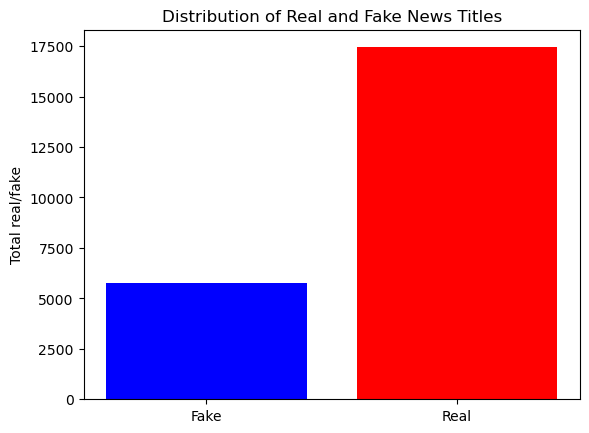

In [13]:
df = News_Sources
tfcounter = df['real'].value_counts()
plt.bar(tfcounter.index, tfcounter.values, color=['red', 'blue'])
plt.ylabel('Total real/fake')
plt.title('Distribution of Real and Fake News Titles')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

From the prepared dataset, we can see that there are around 6,000 fake news titles and a little less than 17,500 real news titles.  Of course, we can't simply assume that the articles were correctly identified based off of the 'real' column.  We will use NLP to parse the text of the article titles to identify what articles are fake or not with Machine Learning.

First, let's do a little preprocessing to get rid of unwanted characters and strings that may interfere with the result.

In [24]:
import re
import string
import sklearn
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]|\W|https?://\S+|www\.\S+|<.*?>+|\n|\w*\d\w*', '', title)
    return text
    df["title"] = df["title"].apply(preprocess_text)

In [20]:
x = df["title"]
y = df["real"]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(xv_train,y_train)
pred_logr = logr.predict(xv_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logr))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_logr)

              precision    recall  f1-score   support

           0       0.81      0.48      0.60      1084
           1       0.86      0.96      0.91      3556

    accuracy                           0.85      4640
   macro avg       0.83      0.72      0.76      4640
weighted avg       0.85      0.85      0.84      4640



0.8521551724137931

Precision is our accuracy in correctly predicting positive observations.  Here, 81% are correctly predicted as fake news and 86% are correctly predicted as real.  So there is about a 19% chance of false positive fake news sources and a 14% chance of false positive real news sources.  Recall shows how many potential instances of false negatives there are.  There is a 52% chance of false negative fake news sources, meaning 52% of all fake news likely to be reported in the future may be falsely flagged as real if future entries in the dataset follow the trends in titles in this data.  Only 4% of real news is likely to be flagged as fake.  Notably the F1-score for fake news being 60% indicates a not very good balance of precision and recall.  This may be because as we could see in the bar graph above, the distribution of news is more skewed towards real news.  If there were more fake news titles, we might see better precision and recall for fake news.

In [39]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xv_train,y_train)
pred_rf = rf.predict(xv_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rf)

              precision    recall  f1-score   support

           0       0.73      0.46      0.57      1131
           1       0.85      0.94      0.89      3509

    accuracy                           0.83      4640
   macro avg       0.79      0.70      0.73      4640
weighted avg       0.82      0.83      0.81      4640



0.8273706896551725

Just to check another statistical modeling method, I tried a Random Forest Method, which wasn't much better.  It actually perfored worse than the Logistic Regression method we tried before.

In [41]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
dect = DecisionTreeClassifier(max_depth=3, random_state=42)
dect.fit(xv_train,y_train)
pred_dect = dect.predict(xv_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dect))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dect)

              precision    recall  f1-score   support

           0       0.67      0.15      0.25      1131
           1       0.78      0.98      0.87      3509

    accuracy                           0.77      4640
   macro avg       0.73      0.56      0.56      4640
weighted avg       0.75      0.77      0.72      4640



0.7747844827586207

A Classification/Decision Tree model also produced worse results.

In conclusion, this dataset is not ideal for identifying fake news.  If you were to use any of these models we created for this, you would find a lot of fake news would be misidentified as real and people would be exposed to fake news titles more often.